In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt

In [9]:
InputPath = ""
X = pickle.load(open(InputPath+"X.pickle","rb"))
y = pickle.load(open(InputPath+"y.pickle","rb"))

In [10]:
X = X/255.0
print(X.shape[1:])
print(y.shape[1:])

(50, 50, 3)
(1,)


In [11]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

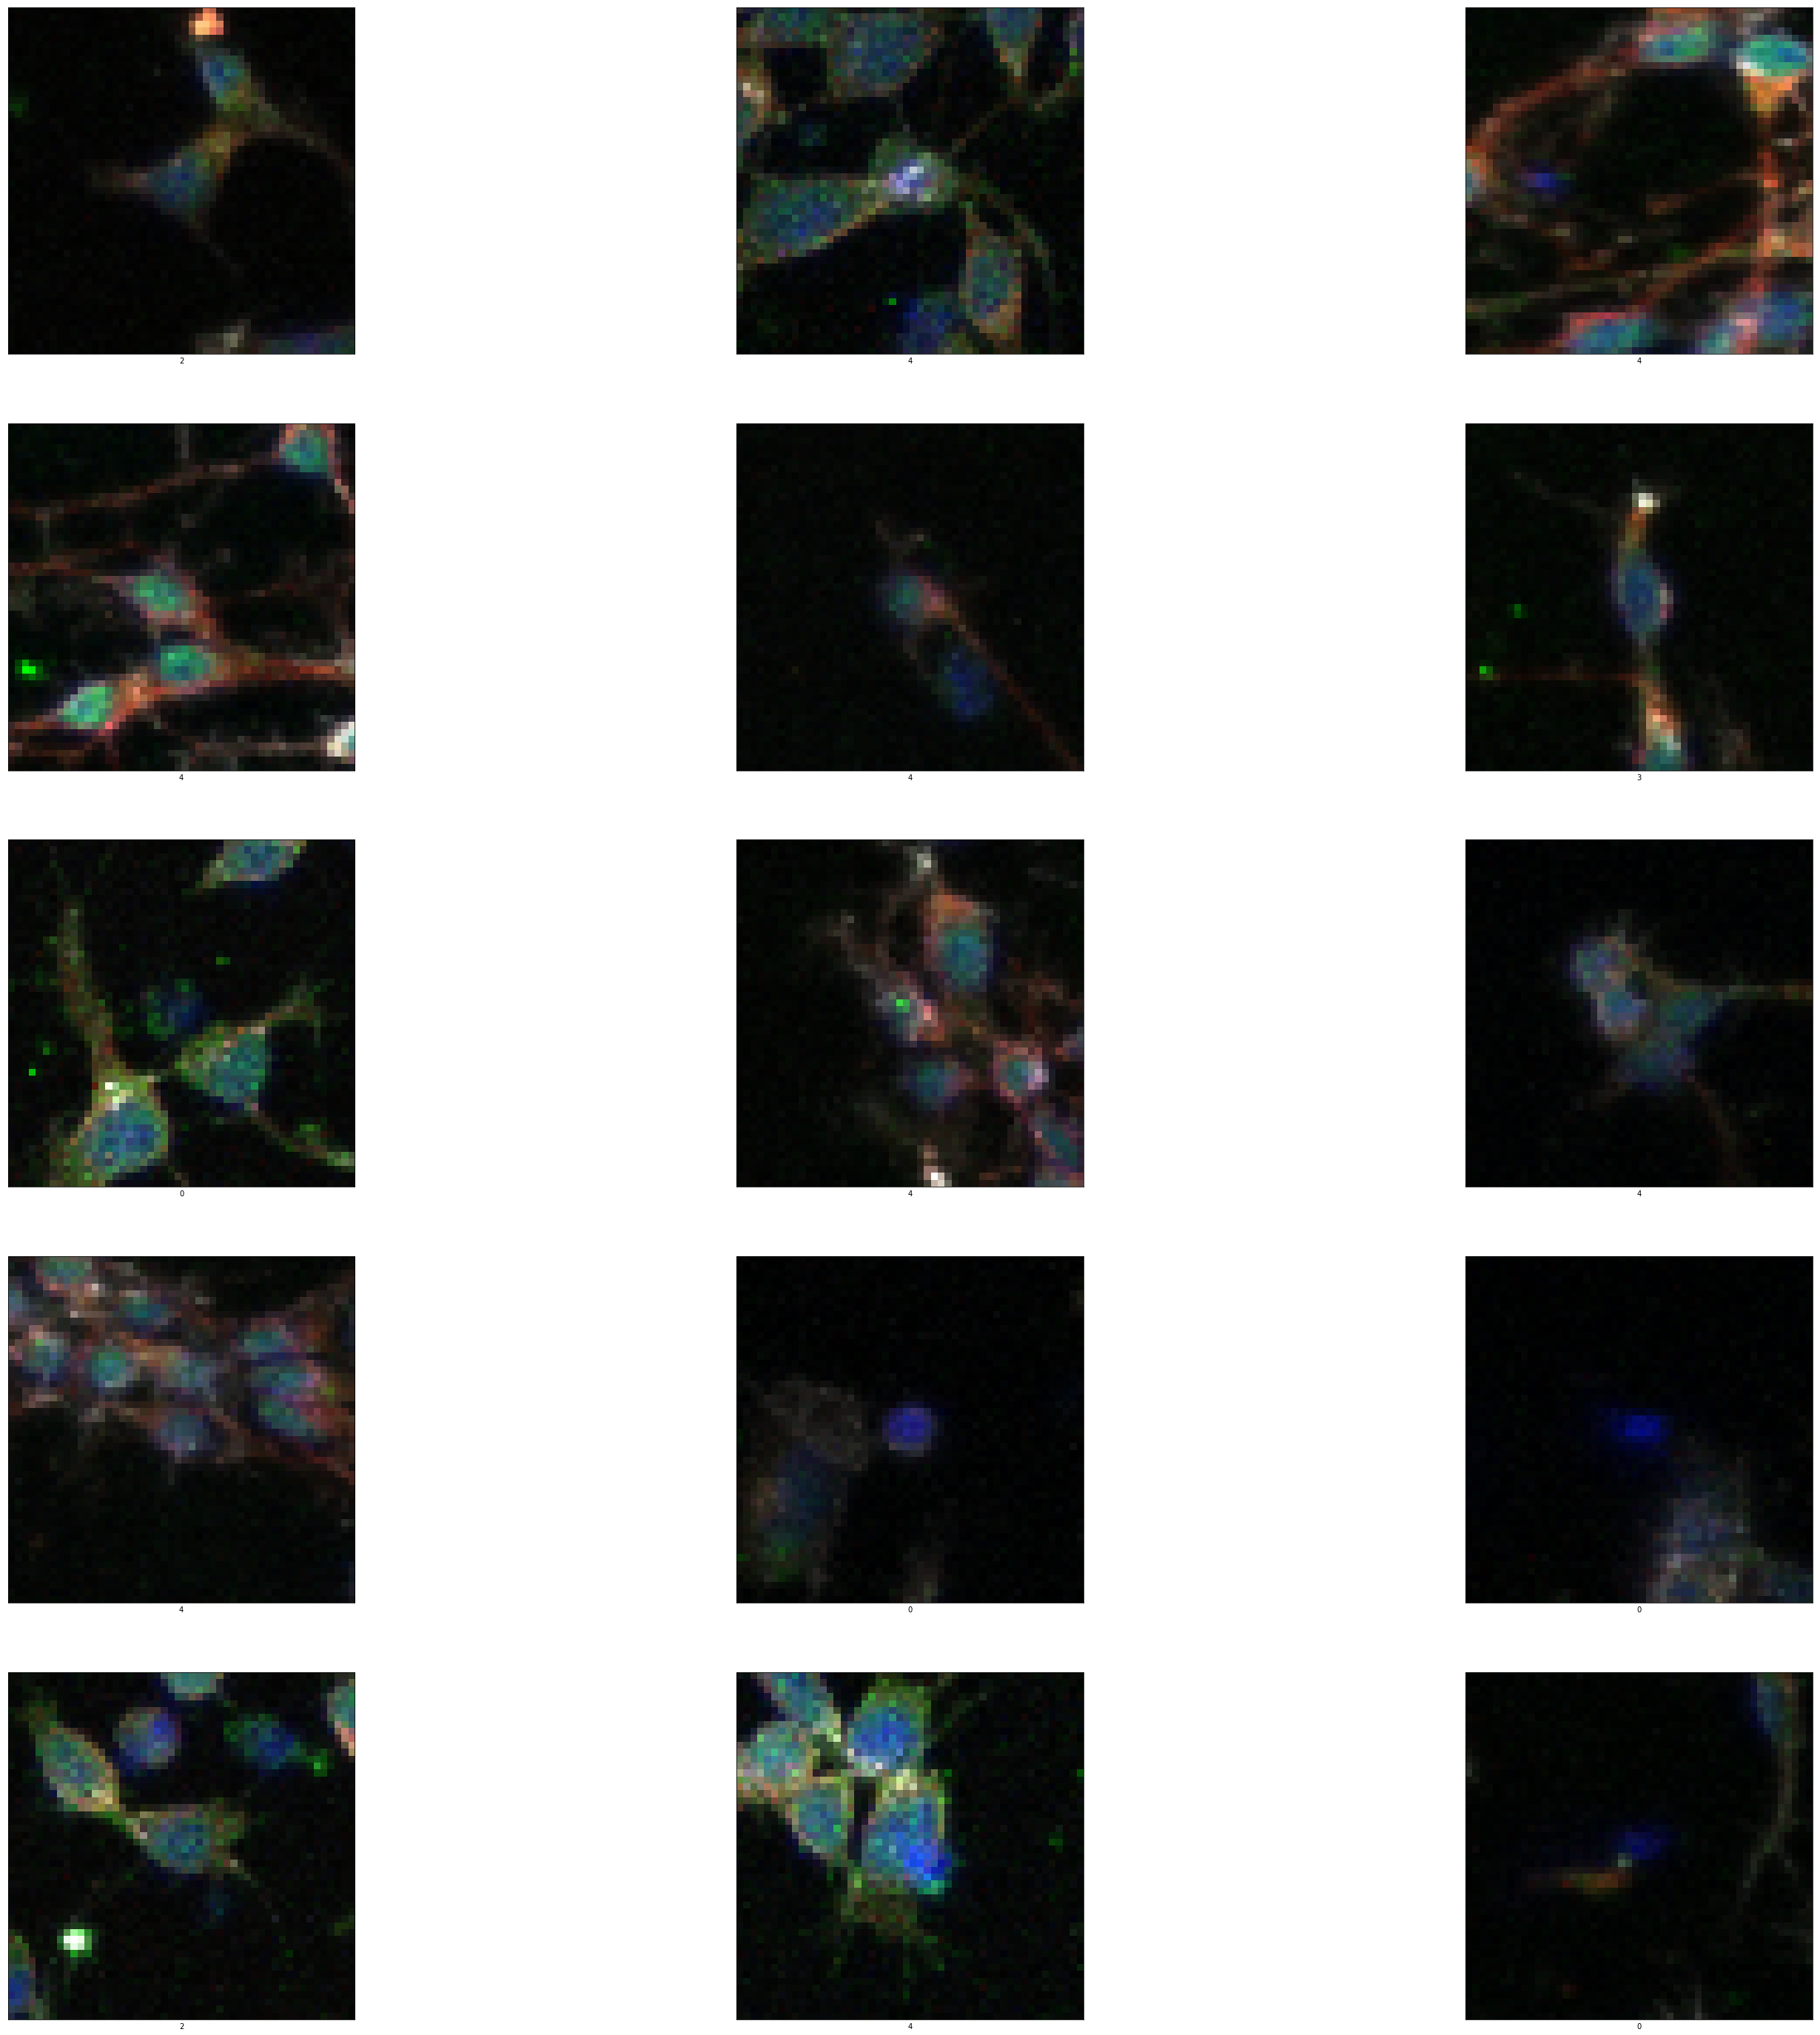

In [12]:
plt.figure(figsize=(50,50))
for i in range(15):
    plt.subplot(5,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    plt.xlabel(str(train_y[i][0]))
plt.show()

In [13]:
import time
NAME = "Cnn64x2-{}-fix_X_withActivation".format(int(time.time()))

In [14]:
# gpu_option = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [22]:
weights = [175, 290, 326, 220, 576]
total = sum(weights)
weights[:] = [x / total for x in weights]
print(weights)

[0.11027095148078135, 0.18273471959672338, 0.20541902961562697, 0.13862633900441085, 0.3629489603024575]


In [24]:
classWeights = { i : weights[i] for i in range(0, len(weights) ) }
classWeights

{0: 0.11027095148078135,
 1: 0.18273471959672338,
 2: 0.20541902961562697,
 3: 0.13862633900441085,
 4: 0.3629489603024575}

In [25]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME))

In [26]:
model = tf.keras.models.Sequential()

# model.add(tf.keras.layers.Conv2D(64,(3,3), input_shape=X.shape[1:]))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(50, 50, 3)))
# model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(64,(3,3)))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation("relu"))


model.add(tf.keras.layers.Dense(5))

model.add(tf.keras.layers.Activation('softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 48, 48, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
activation_3 (Activation)    (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [ ]:
# history = model.fit(X,y,batch_size=32, epochs = 10, validation_split=0.3, callbacks = [tensorboard])
history = model.fit(train_X, train_y, epochs=30, class_weight=classWeights,
                    validation_data=(test_X, test_y))

Train on 1266 samples, validate on 317 samples
Epoch 1/30
1266/1266 [==============================] - 5s 4ms/sample - loss: 0.2755 - accuracy: 0.3973 - val_loss: 0.2461 - val_accuracy: 0.4479
Epoch 2/30
1266/1266 [==============================] - 3s 2ms/sample - loss: 0.2304 - accuracy: 0.5166 - val_loss: 0.2234 - val_accuracy: 0.5647
Epoch 3/30
1266/1266 [==============================] - 3s 2ms/sample - loss: 0.1973 - accuracy: 0.6043 - val_loss: 0.2104 - val_accuracy: 0.6088
Epoch 4/30
1266/1266 [==============================] - 3s 2ms/sample - loss: 0.1717 - accuracy: 0.6493 - val_loss: 0.2178 - val_accuracy: 0.5773
Epoch 5/30
1266/1266 [==============================] - 3s 2ms/sample - loss: 0.1492 - accuracy: 0.6959 - val_loss: 0.2345 - val_accuracy: 0.5678
Epoch 6/30
1266/1266 [==============================] - 3s 2ms/sample - loss: 0.1339 - accuracy: 0.7393 - val_loss: 0.2142 - val_accuracy: 0.6120
Epoch 7/30
1266/1266 [==============================] - 3s 2ms/sample - loss:

In [ ]:

plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=2)